# COMP 562 Final Project Analysis

#### Authors:
Cooper Lee, James Tuong, Nathaniel Turner, Alan Vasquez

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%pip install mlxtend
from sklearn.model_selection import train_test_split
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# import sklearn #need to figure out what parts of sklearn to import that we'll use

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


Loading in the dataset and splitting into test and training set (may want to do each time for the different methods)

In [3]:
dpath = "data/heart.csv"
feature_names = ["age","sex","cp","trtbps","chol","fbs","restecg","thalachh",
                                 "exng","oldpeak","slp","caa","thall", "output"]

data = np.genfromtxt(dpath, delimiter=",", skip_header=1, names=feature_names)

heart_data = np.array([data[i] for i in feature_names[:-1]]).T
heart_attack_odds = data["output"]

In [4]:
DataFrame = pd.DataFrame(data).head()
DataFrame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(heart_data, heart_attack_odds, test_size=0.3,
                                                    random_state=1, stratify=heart_attack_odds)

## Method 1: Binary Tree

## Method 2: Random Forest

In [6]:
forest = RandomForestClassifier(criterion='gini',
                                 max_depth = 8,
                                 n_estimators=10,
                                 random_state=4,
                                 n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=10, n_jobs=2, random_state=4)

In [7]:
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.868


ValueError: y must be an integer array. Found float64. Try passing the array as y.astype(np.int_)

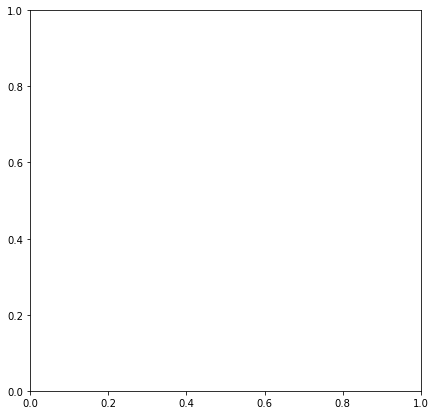

In [8]:
from mlxtend.plotting import plot_decision_regions
 
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
 
#
# plot_decision_regions function takes "forest" as classifier
#
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_combined, y_combined, clf=forest)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Method 3: Logistic Regression